In [4]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pickle
#loading the saved model coefficients and y-intercept of the equation which compares decimal date (time) with CO2 levels
co2_intercept = pickle.load(open("co2_predict_model_intercept.pkl", "rb"))
co2_coefficient = pickle.load(open("co2_predict_model_coefficient.pkl", "rb"))
#taking user inputs of year and month and converting to a decimal date
year = int(input("Year: "))
month = int(input("Month: "))
decimal_date = year + month/12
#using the saved model coefficients and y-intercept to predict future CO2 level based on the decimal date
future_co2_prediction = round(co2_intercept + decimal_date * co2_coefficient[1] + decimal_date**2 * co2_coefficient[2], 2)
print(f"Global CO2 Level (ppm): {future_co2_prediction}")
#loading the saved model coefficients and y-intercept of the equation which compares CO2 levels with sea levels
sea_level_intercept = pickle.load(open("sea_level_predict_model_intercept.pkl", "rb"))
sea_level_coefficient = pickle.load(open("sea_level_predict_model_coefficient.pkl", "rb"))
#using the saved model coefficients and y-intercept to predict future CO2 level based on the prediction of the CO2 level
future_sea_level_prediction = round(sea_level_intercept + future_co2_prediction * sea_level_coefficient[1] + future_co2_prediction**2 * sea_level_coefficient[2], 2)
print(f"Global Mean Sea Level (mm above global average in 1990): {future_sea_level_prediction}")
#loading model predictions of CO2 level and sea level at October 2021 that were saved earlier 
oct_2021_co2_prediction = pickle.load(open("oct_2021_co2_prediction.pkl", "rb"))
oct_2021_sea_level_prediction = pickle.load(open("oct_2021_sea_level_prediction.pkl", "rb"))
#creating a dictionary to convert the number of month to name of month
months = {
    1:"January",
    2:"February",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"
}
#preparing data to plot bar graphs
x = ["October 2021", f"{months[month]} {year}"]
y1 = [oct_2021_co2_prediction, future_co2_prediction]
y2 = [oct_2021_sea_level_prediction, future_sea_level_prediction]
width = 0.60

Year: 2030
Month: 1
Global CO2 Level (ppm): 435.06
Global Mean Sea Level (mm above global average in 1990): 148.04


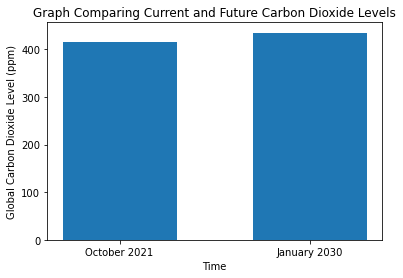

In [5]:
#graph comparing current level of carbon dioxide with model prediction at the year and month inputted
plt.bar(x, y1, width)
plt.title("Graph Comparing Current and Future Carbon Dioxide Levels")
plt.xlabel("Time")
plt.ylabel("Global Carbon Dioxide Level (ppm)")
plt.show()

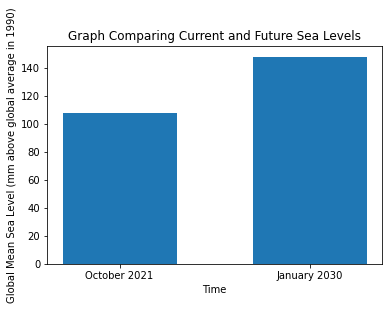

In [6]:
#graph comparing current sea level with model prediction at the year and month inputted
plt.figure()
plt.bar(x, y2, width)
plt.title("Graph Comparing Current and Future Sea Levels")
plt.xlabel("Time")
plt.ylabel("Global Mean Sea Level (mm above global average in 1990)")
plt.show()